In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# เปิดไฟล์ csv ที่ผ่านการทำความสะอาดข้อมูลจากไฟล์ก่อนหน้า
df_66 = pd.read_csv("target/data2566.csv")
df_65 = pd.read_csv("target/data2565.csv")

## เปรียบเทียบระหว่างปี 2565 และ 2566

### เตรียมข้อมูลสำหรับเปรียบเทียบระหว่างปี 2565 และ 2566

In [3]:
# เลือกเลขที่เอกสารสิทธิ์ที่ในปี 2565 เป็นพื้นที่ว่างเปล่า หรือไม่ทำประโยชน์
df_wasteland2565 = df_65[df_65["type_of_usage"] == "wasteland"]
df_wasteland2565 = df_wasteland2565[['location_id', 'type_of_usage']] 
df_wasteland2565 = df_wasteland2565.set_index("location_id")

In [4]:
# เลือกเลขที่เอกสารสิทธิ์ที่ในปี 2566 ทั้งหมดเพื่อดูลักษณะการใช้ประโยชน์
type_of_usage2566 = df_66
type_of_usage2566 = type_of_usage2566[['location_id', 'type_of_usage']] 
type_of_usage2566 = type_of_usage2566.set_index("location_id")

### เปรียบเทียบในปี 2565 พื้นที่ว่างเปล่า หรือไม่ทำประโยชน์มีความเปลี่ยนแปลงลักษณะการประโยชน์หรือไม่

In [5]:
# นำเลขที่เอกสิทธิ์ในปี 2565 และ 2566 มารวมเข้ากัน
merged_df = pd.merge(df_wasteland2565, type_of_usage2566, left_index=True, right_index=True, how='inner')

#### รายงานผล

พบว่าในปี 2565 มีพื้นที่ว่างเปล่า หรือไม่ทำประโยชน์ 482 พื้นที่ ที่ในปี 2566 ยังคงยื่นเลขที่เอกสารสิทธิ์

In [6]:
len(merged_df)

482

จากการทดลองด้านล่างจะพบว่าในปีจากพื้นที่ว่างเปล่า หรือไม่ทำประโยชน์ในปี 2565 เพิ่มขึ้นถึง 72 พื้นที่ในปี 2566 คิดเป็น 14.9378 เปอร์เซ็น

In [7]:
merged_df[merged_df["type_of_usage_y"] == "agriculture"]

,type_of_usage_x,type_of_usage_y
location_id,,
01E040,wasteland,agriculture
02D074,wasteland,agriculture
02D075,wasteland,agriculture
02D080,wasteland,agriculture
02D081,wasteland,agriculture
...,...,...
06J035,wasteland,agriculture
06J045,wasteland,agriculture
06J071,wasteland,agriculture


In [8]:
# จำนวนพื้นที่ทำเกษตร
len(merged_df[merged_df["type_of_usage_y"] == "agriculture"])

72

In [9]:
# เปอร์เซ็นความเปลี่ยนแปลง
len(merged_df[merged_df["type_of_usage_y"] == "agriculture"]) / len(merged_df) * 100

14.937759336099585

นอกจากนี้จากพื้นที่ว่างเปล่า หรือไม่ทำประโยชน์ในปี 2566 ยังเปลี่ยนแปลงเป็นพื้นที่อยู่อาศัย 20 พื้นที่ คิดเป็น 4.1494 เปอร์เซ็น

In [10]:
# จำนวนพื้นที่อยู่อาศัย
len(merged_df[merged_df["type_of_usage_y"] == "living"])  

20

In [11]:
# เปอร์เซ็นความเปลี่ยนแปลง
len(merged_df[merged_df["type_of_usage_y"] == "living"]) / len(merged_df) * 100

4.149377593360995

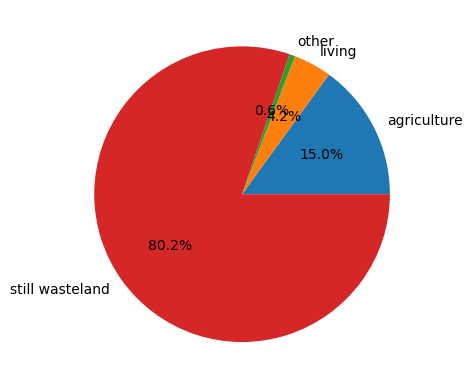

In [12]:
from matplotlib import pyplot as plt

# สร้างกราฟ
data = [ len(merged_df[merged_df["type_of_usage_y"] == "agriculture"]),
         len(merged_df[merged_df["type_of_usage_y"] == "living"]), 
         len(merged_df[merged_df["type_of_usage_y"] == "other"]), 
         len(merged_df[merged_df["type_of_usage_y"] == "wasteland"]), 
       ]
labels = ['agriculture','living','other','still wasteland'] 

plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.show()

พื้นที่ทำเกษตรเทียบระหว่างปี 2565 กับ 2566

## เปรียบเทียบระหว่างปี 2564 และ 2565

## เปรียบเทียบระหว่างปี 2563 และ 2564

## เปรียบเทียบระยะเวลา 4 ปี (2363 - 2566)